In [1]:
#importing columns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading dataset
df=pd.read_csv("nearest-earth-objects(1910-2024).csv",encoding='latin1')

In [3]:
#taking out informatiom of columns
df.info()
#dropping column {name} because the column is not important to decide if the object is harzardous or not,same for (id}. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [4]:
#sns.countplot(df['is_hazardous'])
#plt.show()

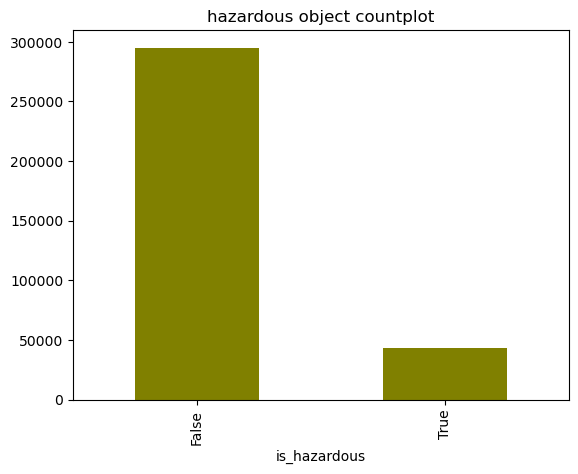

In [5]:
#faster approach than seaborn sns.countplot

#plotted targetted column
plt.title('hazardous object countplot')
df.is_hazardous.value_counts().plot(kind='bar',color='olive')
plt.show()

In [6]:
df.isnull().sum()

#total null value percentage
#null value percentage is very less to affect the accuracy of the model if those values dropped permanantly. 
df.isnull().sum()/len(df)

neo_id                    0.000000
name                      0.000000
absolute_magnitude        0.000083
estimated_diameter_min    0.000083
estimated_diameter_max    0.000083
orbiting_body             0.000000
relative_velocity         0.000000
miss_distance             0.000000
is_hazardous              0.000000
dtype: float64

In [7]:
len(df)

338199

In [8]:
#dropping columns with null values
df=df.dropna()

In [9]:
#null value successfully removed
df.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [10]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381710e+05,338171.000000,338171.000000,338171.000000,338171.000000,3.381710e+05
mean,1.760041e+07,22.932525,0.157812,0.352878,51060.017994,4.153547e+07
std,2.287276e+07,2.911216,0.313885,0.701869,26399.922830,2.077411e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30710.626399,2.494495e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47557.046397,4.332724e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.223798,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


<Axes: xlabel='orbiting_body'>

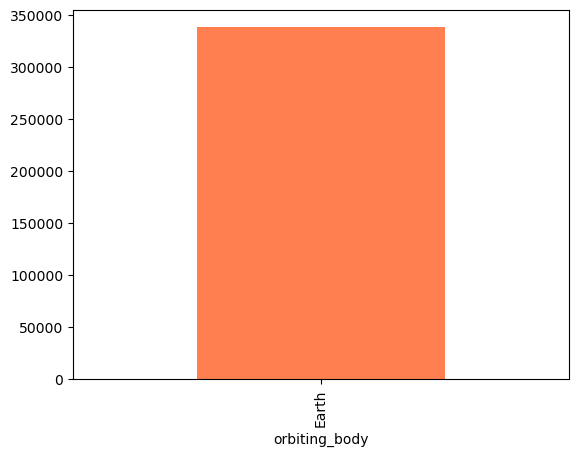

In [11]:
#plotted a suspicious column
#proof that this column has 1 value duplicated n no of times
df.orbiting_body.value_counts().plot(kind='bar',color='coral')

In [12]:
#listing all column names for further use
column_no=1
for x in df.columns:
    
    print(f'{column_no}-> {x}')
    column_no+=1

1-> neo_id
2-> name
3-> absolute_magnitude
4-> estimated_diameter_min
5-> estimated_diameter_max
6-> orbiting_body
7-> relative_velocity
8-> miss_distance
9-> is_hazardous


In [13]:
#dropping unnecessary columns which will not affect the machine learning or the output column
df.drop(['neo_id','name','orbiting_body'],axis=1,inplace=True)

In [14]:
#rechecking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338171 non-null  float64
 1   estimated_diameter_min  338171 non-null  float64
 2   estimated_diameter_max  338171 non-null  float64
 3   relative_velocity       338171 non-null  float64
 4   miss_distance           338171 non-null  float64
 5   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 15.8 MB


In [15]:
#we dont want boolean so feature endocing the output column
pd.get_dummies(df['is_hazardous'],dtype=int,drop_first=True).value_counts()

True
0       295009
1        43162
Name: count, dtype: int64

In [16]:
df['is_hazardous']=pd.get_dummies(df['is_hazardous'],dtype=int,drop_first=True)

absolute_magnitude
Total Revenue 7755114.898
Total Count 338171
Mean 22.93252495926617
Median 22.8
Mode 24.4
Minimum 9.25
Maximum 33.58
Range 24.33
Variance 8.475155809285226
Standard Deviation 2.911212085933491
Quartile 1 20.74
Quartile 3 25.1
Inter Quartile Range 4.360000000000003
Lower Whisker 14.199999999999994
Upper Whisker 31.640000000000008
Skewness 0.08402015435846188
Kurtosis -0.4755877693524617


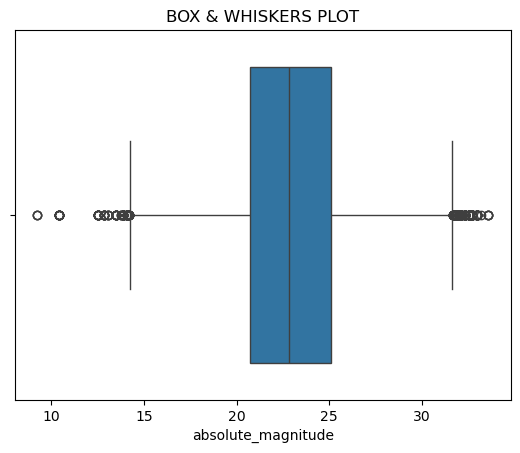

++++++++++++++++++++++++++++++++++++++++++++++++++
estimated_diameter_min
Total Revenue 53367.4576312465
Total Count 338171
Mean 0.15781204666055487
Median 0.0732073989
Mode 0.0350392641
Minimum 0.0005111578
Maximum 37.5452479361
Range 37.5447367783
Variance 0.09852358843840703
Standard Deviation 0.31388467378705676
Quartile 1 0.0253837029
Quartile 3 0.1890405519
Inter Quartile Range 0.163656849
Lower Whisker -0.2201015706
Upper Whisker 0.43452582539999995
Skewness 30.963126247146004
Kurtosis 2664.5642097761993


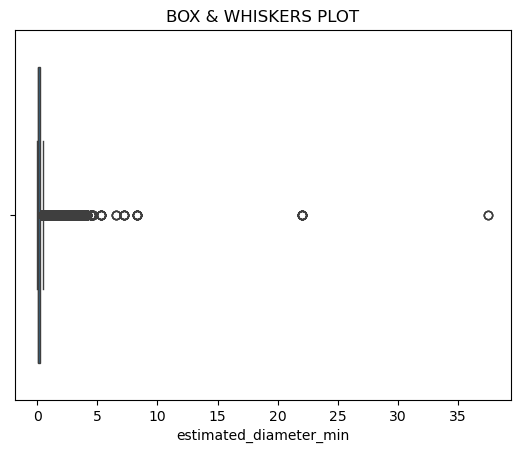

++++++++++++++++++++++++++++++++++++++++++++++++++
estimated_diameter_max
Total Revenue 119333.2630495297
Total Count 338171
Mean 0.3528784640005491
Median 0.1636967205
Mode 0.0783501764
Minimum 0.0011429835
Maximum 83.9537266171
Range 83.9525836336
Variance 0.49261794218983734
Standard Deviation 0.7018674676816395
Quartile 1 0.0567596853
Quartile 3 0.4227075246
Inter Quartile Range 0.36594783929999997
Lower Whisker -0.49216207365
Upper Whisker 0.97162928355
Skewness 30.963126247273113
Kurtosis 2664.56420978674


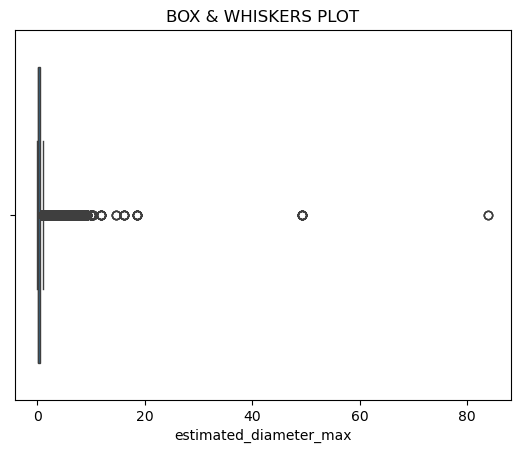

++++++++++++++++++++++++++++++++++++++++++++++++++
relative_velocity
Total Revenue 17267017345.210663
Total Count 338171
Mean 51060.01799447813
Median 47557.0463973955
Mode 51964.0584077668
Minimum 203.34643253
Maximum 291781.1066131202
Range 291577.7601805902
Variance 696953864.497548
Standard Deviation 26399.883797046303
Quartile 1 30710.62639880895
Quartile 3 66673.2237976368
Inter Quartile Range 35962.59739882786
Lower Whisker -23233.269699432836
Upper Whisker 120617.1198958786
Skewness 0.8494634880530734
Kurtosis 0.9675623188303257


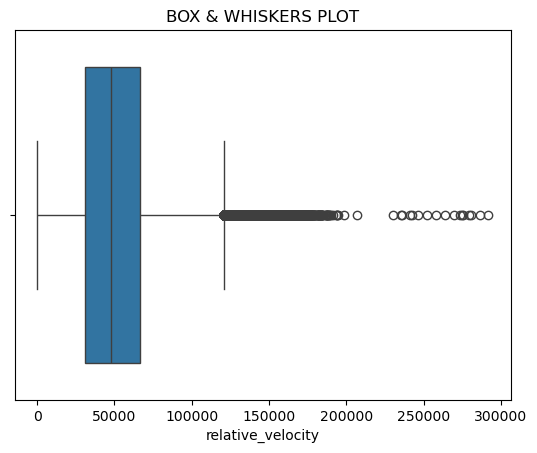

++++++++++++++++++++++++++++++++++++++++++++++++++
miss_distance
Total Revenue 14046092596668.555
Total Count 338171
Mean 41535473.46362803
Median 43327242.019174896
Mode 573908.202837078
Minimum 6745.532515957
Maximum 74798651.4521972
Range 74791905.91968124
Variance 431562566565299.0
Standard Deviation 20774084.012665853
Quartile 1 24944951.86011888
Quartile 3 59339605.219975345
Inter Quartile Range 34394653.359856464
Lower Whisker -26647028.17966582
Upper Whisker 110931585.25976005
Skewness -0.23505259022004793
Kurtosis -1.0567229932223257


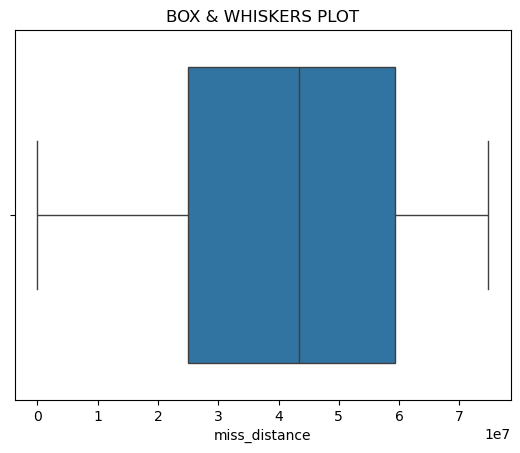

++++++++++++++++++++++++++++++++++++++++++++++++++
is_hazardous
Total Revenue 43162
Total Count 338171
Mean 0.12763365279695776
Median 0.0
Mode 0
Minimum 0
Maximum 1
Range 1
Variance 0.11134330347015588
Standard Deviation 0.33368144010441436
Quartile 1 0.0
Quartile 3 0.0
Inter Quartile Range 0.0
Lower Whisker 0.0
Upper Whisker 0.0
Skewness 2.2318672988565034
Kurtosis 2.9812316397050243


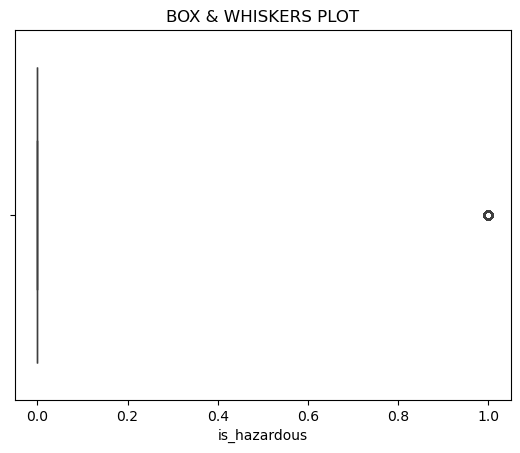

++++++++++++++++++++++++++++++++++++++++++++++++++


In [17]:
import Omkar_Stats
for col_name in df.columns:
    print(col_name)
    Omkar_Stats.cal_stats(df[col_name])
    print('+'*50)

absolute_magnitude


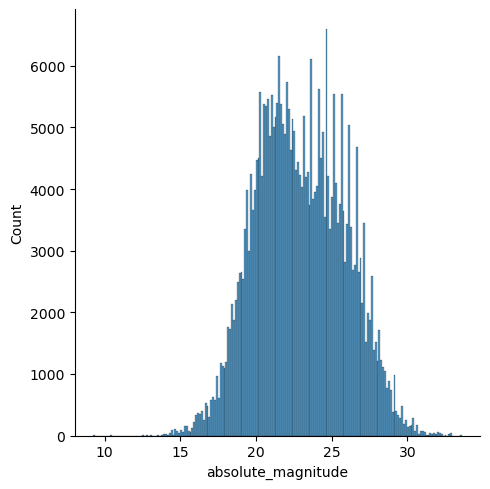

estimated_diameter_min


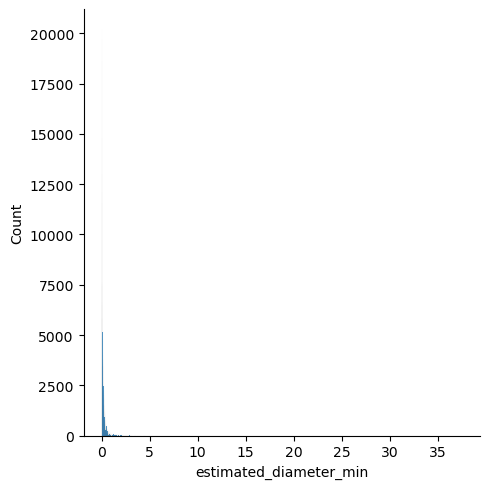

estimated_diameter_max


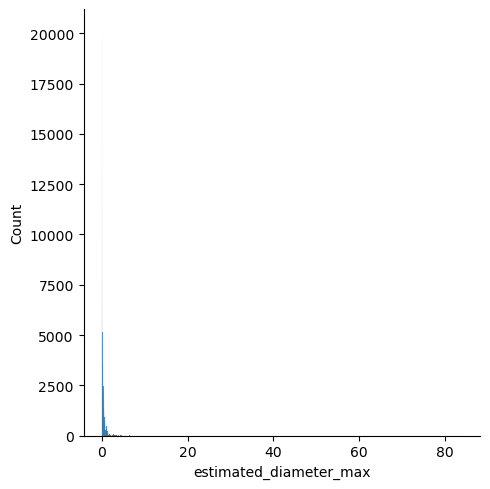

relative_velocity


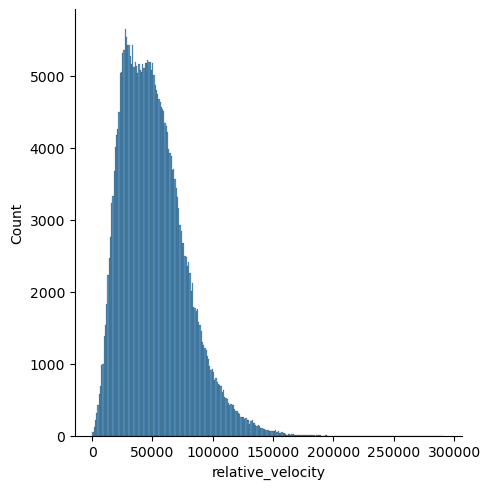

miss_distance


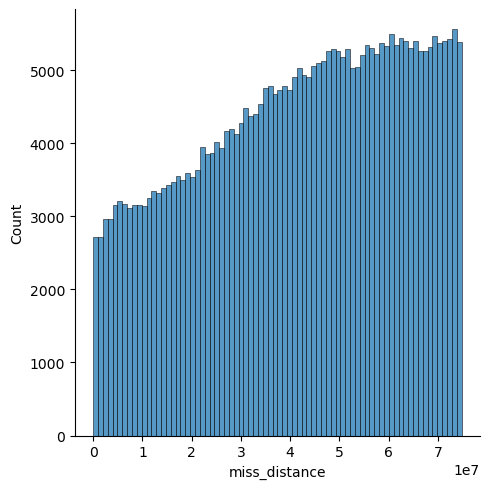

is_hazardous


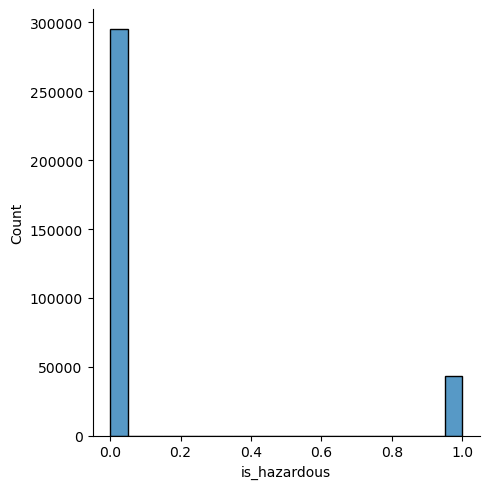

In [18]:
#data distribution plot
for col_name in df.columns:
    print(col_name)
    sns.displot(df[col_name])
    plt.show()

absolute_magnitude


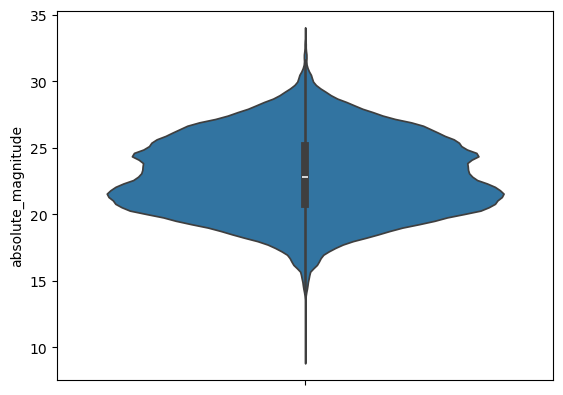

estimated_diameter_min


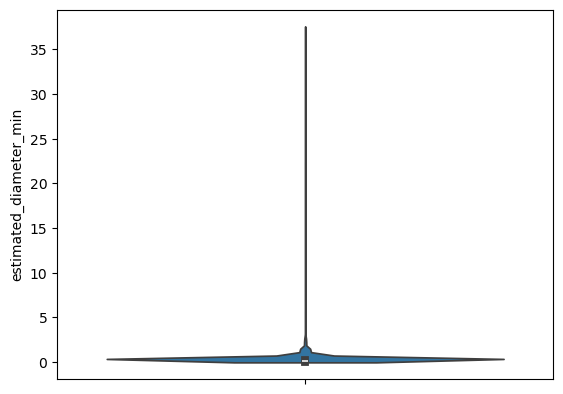

estimated_diameter_max


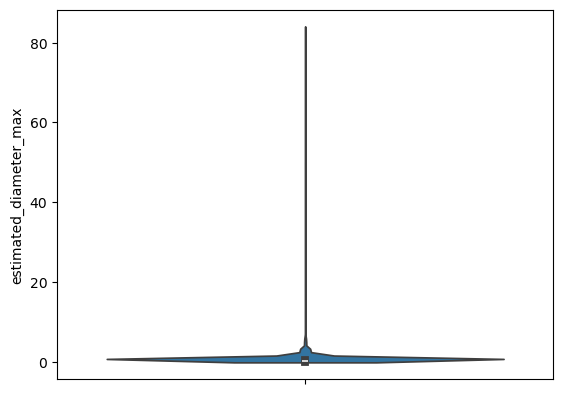

relative_velocity


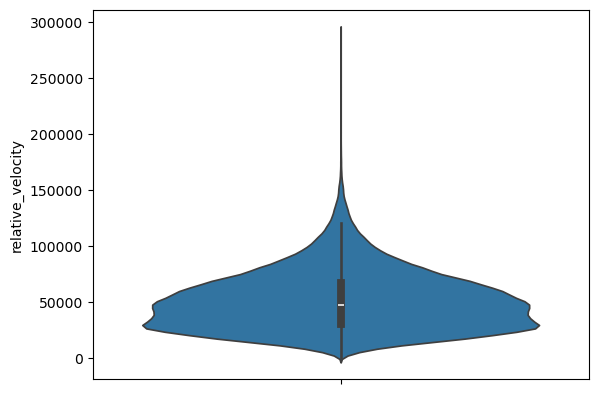

miss_distance


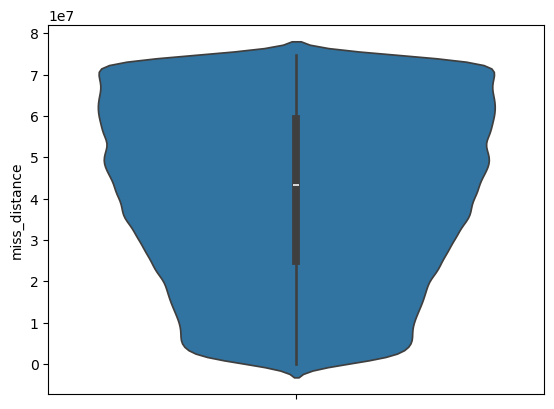

is_hazardous


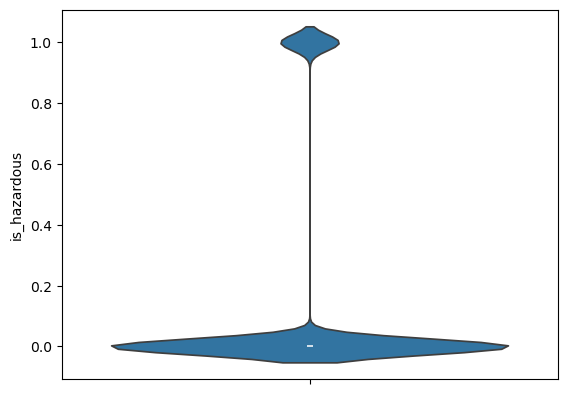

In [19]:
#create violin plot
for col_name in df.columns:
    print(col_name)
    sns.violinplot(df[col_name])
    plt.show()

In [20]:
#create pairplot
#sns.pairplot(data=df,corner=True,hue='is_hazardous')

<Axes: >

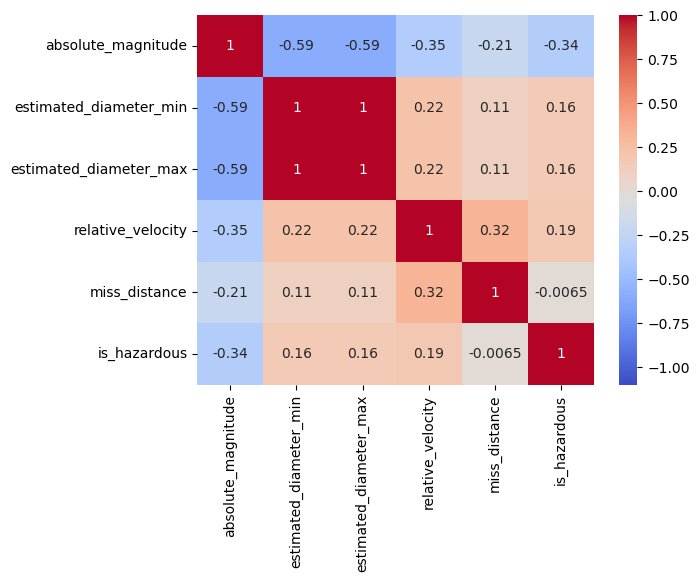

In [21]:
#create a correlation heatmap
sns.heatmap(df.corr(),vmin=1,vmax=-1,annot=True,cmap='coolwarm')
#it is founf that the two columns are replication each other in sense.

In [22]:
#dropping the replica column 'estimated_diametre_min'
df.drop('estimated_diameter_min',axis=1,inplace=True)

In [23]:
X=df.drop('is_hazardous',axis=1)
Y=df['is_hazardous']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_Test=train_test_split(X,Y,test_size=0.2)

<Axes: xlabel='is_hazardous'>

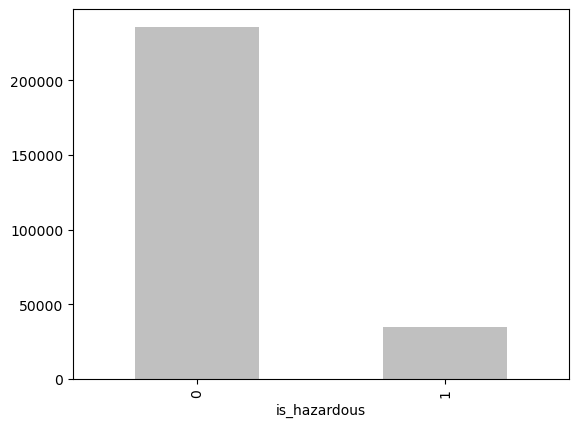

In [25]:
Y_train.value_counts().plot(kind='bar',color='silver')

#found out that data separation is not ideally separated

<Axes: xlabel='is_hazardous'>

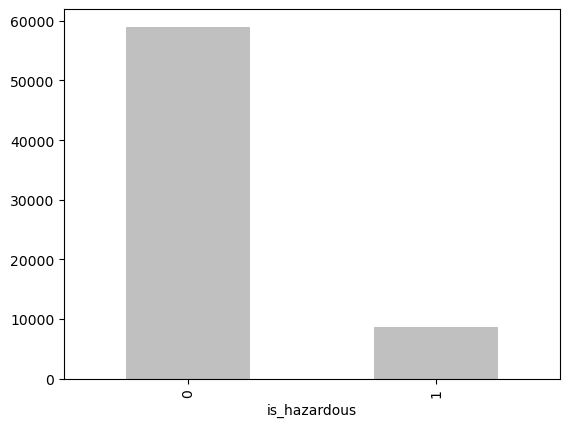

In [26]:
Y_Test.value_counts().plot(kind='bar',color='silver')


In [27]:
#install imblearn library
!pip install imblearn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
#spotted over sampled data.
from imblearn import over_sampling


In [29]:
#Synthetic  Minority Over Sampling Technique
sm=over_sampling.SMOTE()

In [30]:
x_train_balanced,y_train_balanced=sm.fit_resample(X_train,Y_train)


In [31]:
Y_train.value_counts()

is_hazardous
0    235997
1     34539
Name: count, dtype: int64

In [32]:
y_train_balanced.value_counts()

is_hazardous
0    235997
1    235997
Name: count, dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [34]:
x_train_balanced=ss.fit_transform(x_train_balanced)
X_test=ss.fit_transform(X_test)


In [35]:
#Applying logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [36]:
lr.fit(x_train_balanced,y_train_balanced)

LogisticRegression()

In [37]:
y_pred=lr.predict(X_test)

In [38]:
from sklearn.metrics import classification_report


In [39]:
print(classification_report(Y_Test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74     59012
           1       0.26      0.99      0.41      8623

    accuracy                           0.64     67635
   macro avg       0.63      0.79      0.58     67635
weighted avg       0.90      0.64      0.70     67635



In [40]:
#trying random forest algorithm
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc=RandomForestClassifier()

In [42]:
rfc.fit(x_train_balanced,y_train_balanced)

RandomForestClassifier()

In [43]:
rfc_pred=rfc.predict(X_test)

In [44]:
print(classification_report(Y_Test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      0.57      0.68     59012
           1       0.08      0.25      0.12      8623

    accuracy                           0.53     67635
   macro avg       0.46      0.41      0.40     67635
weighted avg       0.74      0.53      0.61     67635



In [45]:
#trying naive bayes-gaussion naive bayes for classification 
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [46]:
gnb.fit(x_train_balanced,y_train_balanced)

GaussianNB()

In [47]:
gnb_pred=gnb.predict(X_test)

In [48]:
print(classification_report(Y_Test,gnb_pred))

              precision    recall  f1-score   support

           0       0.99      0.57      0.72     59012
           1       0.24      0.95      0.39      8623

    accuracy                           0.62     67635
   macro avg       0.62      0.76      0.56     67635
weighted avg       0.89      0.62      0.68     67635



#we should be following more cleaning steps in the data set before further initiation with machine learning algorithms or hyperparametre tuning as grid search cv.

In [51]:
def remove_outliers(data,column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-IQR*1.5
    upper=Q3+IQR*1.5
    before=len(data)
    data=data[(data[column]>=lower) & (data[column]<=upper)]
    removed=before-len(data)
    print('removed no of rows:-',removed)

In [53]:
for col_name in df.drop('is_hazardous',axis=1).columns:
    remove_outliers(df,col_name)

removed no of rows:- 389
removed no of rows:- 26166
removed no of rows:- 5448
removed no of rows:- 0
